# Análisis y Predicción de la Tasa de Cancelación de Usuarios en un Gimnasio

## Introducción

El presente proyecto tiene como objetivo analizar los datos proporcionados por Model Fitness sobre la cancelación de usuarios, con el fin de identificar patrones que puedan predecir la probabilidad de que un cliente abandone el gimnasio. Utilizando técnicas de análisis exploratorio de datos (EDA) y aprendizaje automático, buscamos comprender las características que influyen en la fidelidad de los usuarios y desarrollar modelos predictivos que permitan mejorar las estrategias de retención.

A través de un análisis detallado de las variables relacionadas con la frecuencia de asistencia, el tipo de contrato, la proximidad al gimnasio, entre otras, se busca identificar los factores más influyentes en las decisiones de cancelación. Además, se realizará un proceso de segmentación de los usuarios mediante técnicas de clustering para agrupar a los clientes según sus comportamientos y características, lo que permitirá desarrollar recomendaciones personalizadas para cada grupo.

Planteamiento del Desarrollo del Proyecto

El proyecto se desarrollará en cinco pasos fundamentales:

1. **Descarga y Comprensión de los Datos:**
   En esta etapa se descargarán los datos proporcionados en formato CSV. Se examinarán los diferentes campos del dataset, los cuales incluyen información sobre las características personales de los usuarios, sus patrones de asistencia y los datos de su contrato con el gimnasio. Además, se verificarán los datos faltantes y se explorarán las estadísticas descriptivas de las variables, tales como la media y la desviación estándar, para obtener una visión inicial de las características de los usuarios.

2. **Análisis Exploratorio de Datos (EDA):**
   En esta fase, se realizarán análisis visuales y estadísticos para observar las distribuciones de las variables y su relación con la cancelación de membresía. Se utilizarán histogramas y distribuciones para comparar las características de los usuarios que permanecen activos frente a los que cancelan. Además, se calculará la matriz de correlación para identificar qué variables tienen la mayor relación con la cancelación.

3. **Construcción de Modelos Predictivos:**
   En este paso, se desarrollarán modelos de clasificación binaria para predecir la probabilidad de cancelación de un usuario en función de sus características. Se emplearán dos modelos de machine learning: **Regresión Logística** y **Bosque Aleatorio**. Estos modelos serán entrenados utilizando los datos de entrenamiento y evaluados mediante métricas como la **exactitud**, **precisión** y **recall** en el conjunto de validación, para determinar cuál ofrece mejores resultados en términos de predicción de cancelaciones.

4. **Segmentación de Usuarios mediante Clustering:**
   A continuación, se llevará a cabo una segmentación de los usuarios utilizando el algoritmo de clustering **K-means** para agrupar a los clientes en función de sus características. Se estandarizarán los datos y se utilizará un dendrograma para determinar el número óptimo de clústeres. Tras la segmentación, se analizarán las características promedio de cada clúster y se calculará la tasa de cancelación para cada uno, con el fin de identificar grupos con mayor riesgo de abandonar el gimnasio.

5. **Reporte de Análisis de Retención y Cancelación de Clientes del Gimnasio:**
   Finalmente, se formularán conclusiones basadas en el análisis realizado. Se identificarán los clústeres con mayor probabilidad de cancelación y se propondrán estrategias de marketing y retención adaptadas a cada grupo. Las recomendaciones incluirán acciones para mejorar la fidelización de los usuarios y reducir la tasa de cancelación, como la implementación de promociones personalizadas, la mejora en la comunicación con los usuarios y la optimización de los servicios del gimnasio.

Este enfoque integral permitirá al gimnasio no solo predecir la cancelación de usuarios, sino también implementar medidas efectivas para mantener la lealtad de sus clientes y optimizar sus estrategias de retención.


## Importar librerias

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

 ## Descarga y Comprensión de los Datos

**Leer el dataframe**

In [2]:
gym_churn_us = pd.read_csv('gym_churn_us.csv')
gym_churn_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

### Observar el dataset

In [3]:
gym_churn_us.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [4]:
gym_churn_us.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


## Análisis Exploratorio de Datos (EDA)

### Observar los valores medios de las características en dos grupos

In [5]:
# Agrupar los datos por la columna 'Churn' (cancelación) y calcular la media de cada característica
mean_values_by_churn = gym_churn_us.groupby('Churn').mean()

# Mostrar los valores medios de las características por grupo
mean_values_by_churn


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


1. **Género (gender)**  
La proporción de género es similar entre los clientes que se quedan y los que cancelan (0.510 para ambos grupos).  
Esto confirma que el género no es un factor determinante para la cancelación.

2. **Proximidad al gimnasio (Near_Location)**  
Los clientes que permanecen tienen una mayor probabilidad de vivir cerca del gimnasio (0.87) en comparación con los que cancelan (0.77).  
La proximidad al gimnasio parece influir positivamente en la retención.

3. **Convenios empresariales (Partner)**  
Un porcentaje significativamente mayor de clientes con convenio empresarial se mantiene (53%) en comparación con los que cancelan (35%).  
Esto sugiere que los convenios empresariales fomentan la lealtad.

4. **Promociones de amigos (Promo_friends)**  
Los clientes que se quedan son más propensos a haber sido atraídos por promociones de amigos (35%) frente a los que cancelan (18%).  
Las recomendaciones parecen asociarse con mayor fidelidad.

5. **Teléfono registrado (Phone)**  
No hay una diferencia significativa entre ambos grupos (90% en ambos casos).  
El hecho de registrar un teléfono no parece influir en la cancelación.

6. **Periodo del contrato (Contract_period)**  
Los clientes que permanecen tienen un periodo promedio de contrato mucho mayor (5.74 meses) en comparación con los que cancelan (1.73 meses).  
Contratos más largos están asociados con mayor lealtad.

7. **Visitas grupales (Group_visits)**  
Los clientes fieles participan más frecuentemente en actividades grupales (46%) frente a los que cancelan (26%).  
Las actividades grupales parecen ser un buen predictor de retención.

8. **Edad (Age)**  
Los clientes que se quedan tienen una edad promedio de 30 años, mientras que los que cancelan tienen en promedio 27 años.  
Clientes más jóvenes parecen ser más propensos a abandonar.

9. **Gasto en servicios adicionales (Avg_additional_charges_total)**  
Los clientes que permanecen gastan más en servicios adicionales ($158) en comparación con los que cancelan ($115).  
Un mayor gasto en servicios adicionales podría estar relacionado con la lealtad.

10. **Meses restantes en el contrato (Month_to_end_contract)**  
Los clientes que permanecen tienen más meses restantes en sus contratos (5.28 meses) frente a los que cancelan (1.66 meses).  
Un tiempo restante mayor en el contrato parece correlacionarse con la permanencia.

11. **Tiempo de vida (Lifetime)**  
Los clientes que se quedan tienen un tiempo de vida promedio mucho mayor (4.7 meses) que los que cancelan (0.99 meses).  
Esto indica que los clientes con más tiempo en el gimnasio tienden a ser más fieles.

12. **Frecuencia promedio de clases (Avg_class_frequency_total y Avg_class_frequency_current_month)**  
Los clientes que permanecen asisten más frecuentemente a clases, tanto en promedio histórico (2.02 vs. 1.47) como en el mes actual (2.03 vs. 1.04).  
La frecuencia de visitas al gimnasio es un fuerte predictor de retención.


### Histogramas de barras y distribuciones de características

**Separar los clientes leales de los que cancelaron**

In [6]:
# Crear un dataframe para los clientes que se fueron (Churn = 1)
churned_customers = gym_churn_us[gym_churn_us['Churn'] == 1]

# Crear un dataframe para los clientes que no se fueron (Churn = 0)
retained_customers = gym_churn_us[gym_churn_us['Churn'] == 0]

**Definir una función que itere sobre todas las columnas para generar los histogramas**

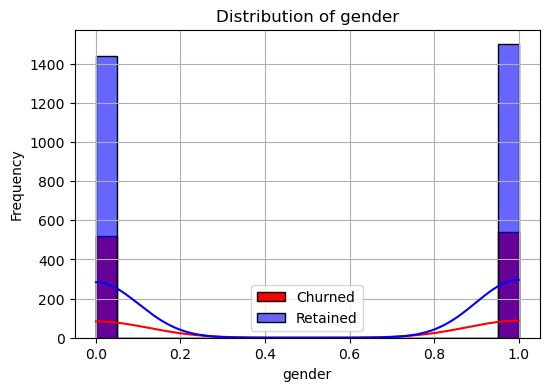

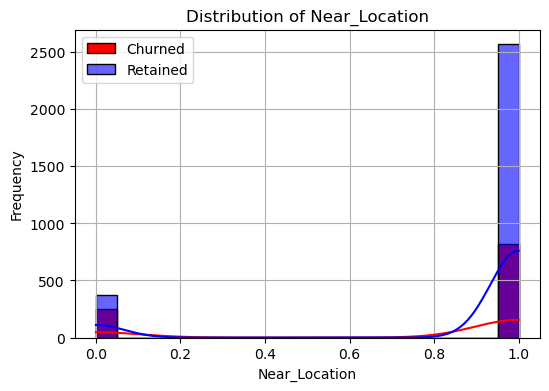

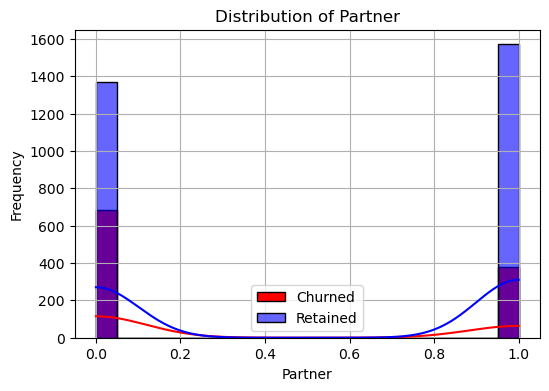

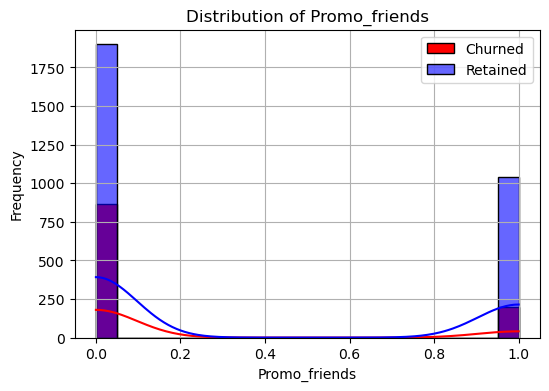

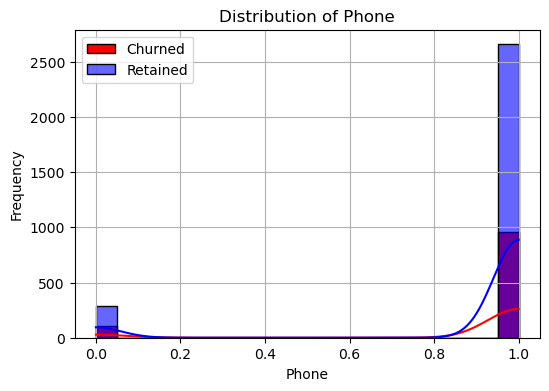

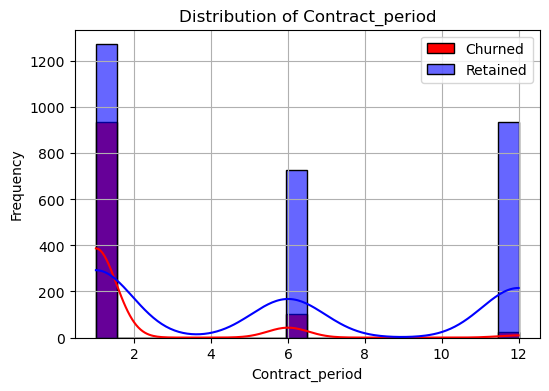

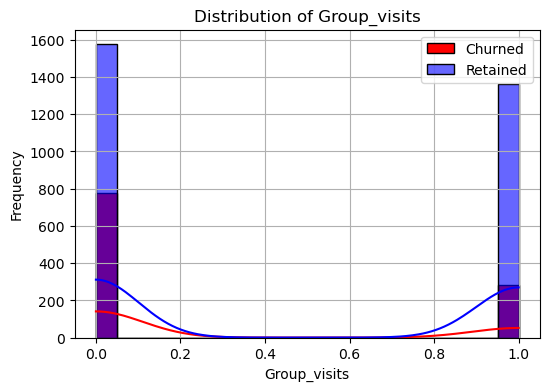

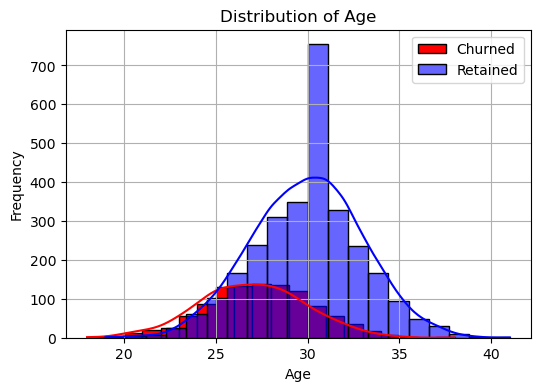

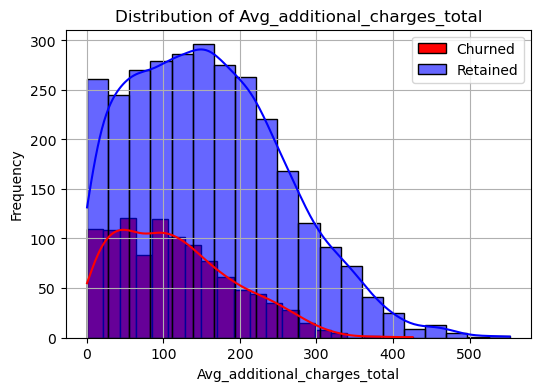

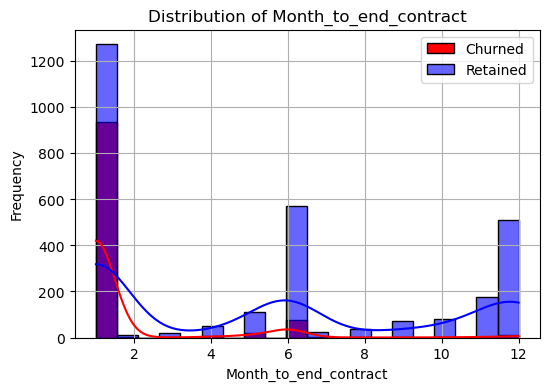

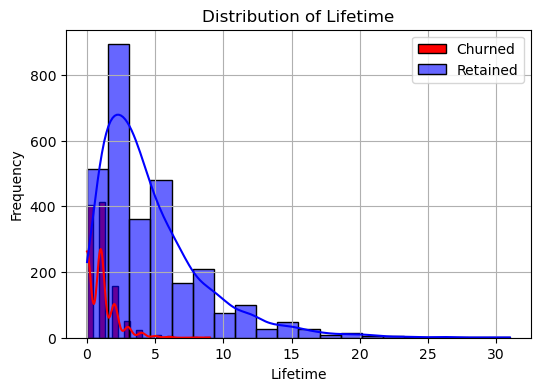

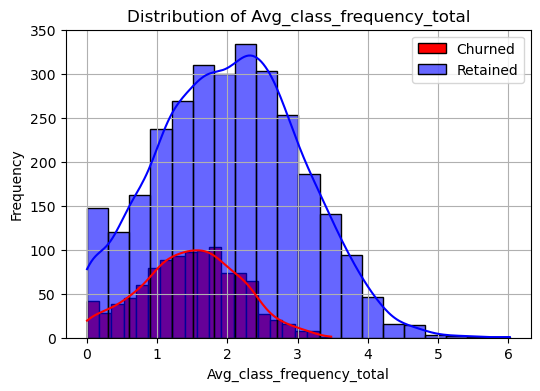

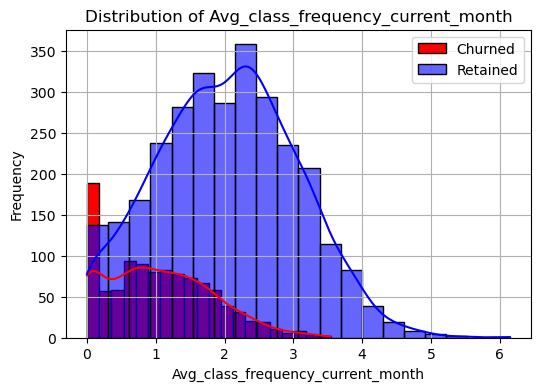

In [7]:
def plot_histograms(df1, df2, columns):
    for column in columns:
        plt.figure(figsize=(6, 4))
        
        # Histogramas de ambas categorías
        sns.histplot(df1[column], label='Churned', color='red', kde=True, bins=20, alpha=1)
        sns.histplot(df2[column], label='Retained', color='blue', kde=True, bins=20, alpha=0.6)
        
        plt.title(f'Distribution of {column}')
        plt.legend()
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

# Lista de columnas que deseas graficar
columns_to_plot = gym_churn_us.columns.drop('Churn')

# Llamada a la función
plot_histograms(churned_customers, retained_customers, columns_to_plot)

### Conclusiones basadas en el análisis de los histogramas

1. **Género:**
   - La distribución del género no parece tener un impacto significativo en la tasa de retención de usuarios, ya que los datos son homogéneos.

2. **Proximidad al gimnasio:**
   - Los clientes que viven más cerca del gimnasio tienden a permanecer activos.
   - Aquellos que viven lejos son proporcionalmente más propensos a darse de baja.

3. **Convenio empresarial:**
   - Los clientes con convenios empresariales son usuarios más fieles.

4. **Promociones de amigos:**
   - Aunque menos frecuentes, los clientes atraídos por promociones de amigos son menos propensos a darse de baja.

5. **Número de teléfono:**
   - La mayoría de los clientes han proporcionado su número de teléfono, pero esto no parece ser un factor relevante para predecir la retención o cancelación.

6. **Duración del contrato:**
   - Los clientes con contratos de un mes son más propensos a abandonar.
   - A medida que aumenta la duración del contrato, la fidelidad de los clientes también crece.

7. **Participación en actividades grupales:**
   - Los usuarios que participan en actividades grupales muestran una mayor fidelidad.
   - Aquellos que no participan en actividades grupales tienen mayor probabilidad de darse de baja.

8. **Edad de los clientes:**
   - Los clientes más jóvenes tienden a darse de baja con mayor frecuencia.
   - Los clientes más fieles suelen tener una edad ligeramente superior.

9. **Gasto en servicios adicionales:**
   - Los clientes que utilizan otros servicios del gimnasio (cafetería, productos deportivos, masajes) tienden a ser más leales.
   - Un bajo consumo de servicios adicionales está relacionado con una mayor probabilidad de cancelación.

10. **Tiempo restante del contrato:**
    - Cuando queda un mes para que el contrato expire, hay un aumento en las cancelaciones.
    - Los clientes con más tiempo restante en sus contratos muestran mayor lealtad.

11. **Periodo de vida del cliente:**
    - Los clientes con menos de 5 meses de antigüedad son más propensos a darse de baja.
    - Aquellos que superan este periodo tienden a convertirse en clientes fieles a largo plazo.

12. **Frecuencia de asistencia semanal:**
    - Los clientes que asisten menos de 3.5 veces por semana tienen mayor probabilidad de abandonar.
    - Los clientes fieles asisten casi todos los días, con un promedio de 3 visitas semanales.

13. **Asistencia mensual:**
    - Los clientes que no asisten durante un mes completo casi siempre se dan de baja.
    - Los clientes que se dan de baja promedian una visita semanal.
    - Los clientes fieles promedian poco más de dos visitas por semana a lo largo del mes.


### Matriz de correlación

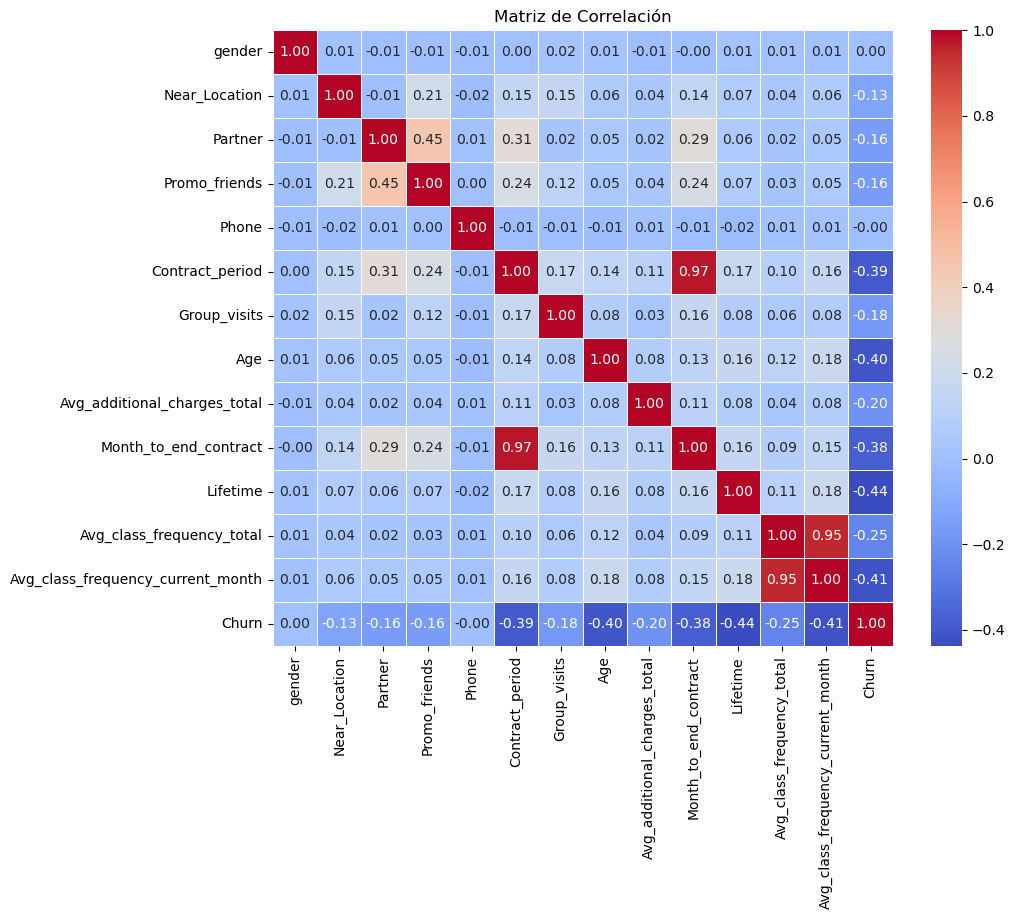

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlation_matrix = gym_churn_us.corr()

# Mostrar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


**1. Correlación entre características relacionadas con la fidelidad de los clientes y la cancelación:**
   - **`month_to_end_contract` y `churn`**: Existe una correlación negativa fuerte entre el número de meses restantes en el contrato (`month_to_end_contract`) y la cancelación (`churn`), con un valor de -0.38. Esto sugiere que a medida que se acerca el final del contrato, los clientes son más propensos a cancelarlo. En cambio, si queda mucho tiempo en el contrato, la lealtad parece ser mayor.
   - **`lifetime` y `churn`**: La correlación negativa entre la vida del cliente en el gimnasio (`lifetime`) y la cancelación (`churn`) es de -0.44. Esto indica que los clientes con mayor tiempo de permanencia en el gimnasio tienen menos probabilidades de cancelar su membresía.

**2. Frecuencia de clases:**
   - **`avg_class_frequency_total` y `avg_class_frequency_current_month`**: Ambas características están fuertemente correlacionadas (0.95), lo que sugiere que la frecuencia total de clases a lo largo del tiempo está muy relacionada con la frecuencia de clases en el mes actual.
   - **`avg_class_frequency_total` y `churn`**: Existe una correlación negativa moderada entre la frecuencia total de clases y la cancelación (-0.25). Esto implica que los clientes que asisten más frecuentemente a clases tienen menos probabilidades de cancelar.

**3. Proximidad al gimnasio y la fidelidad:**
   - **`near_location` y `churn`**: La correlación negativa de -0.13 entre la proximidad al gimnasio (`near_location`) y la cancelación (`churn`) sugiere que los clientes que viven cerca del gimnasio tienen menos probabilidades de cancelar, aunque la relación no es tan fuerte.

**4. Convenios empresariales y promociones:**
   - **`partner` y `churn`**: La correlación negativa de -0.16 entre tener un convenio empresarial y la cancelación indica que los clientes con convenio empresarial tienen menos probabilidades de cancelar su membresía.
   - **`promo_friends` y `churn`**: La correlación negativa de -0.16 también entre las promociones de amigos y la cancelación sugiere que aquellos que llegan al gimnasio por recomendación de amigos son menos propensos a cancelar.

**5. Edad y la fidelidad:**
   - **`age` y `churn`**: La correlación negativa entre la edad y la cancelación (-0.40) sugiere que los clientes más jóvenes tienen más probabilidades de cancelar, mientras que los clientes mayores son más propensos a permanecer.

**6. `contract_period` y fidelidad:**
   - **`contract_period` y `churn`**: La correlación negativa de -0.39 entre el periodo del contrato y la cancelación es significativa. Los clientes con contratos más largos tienen una menor probabilidad de cancelar su membresía, lo cual es esperado.

**Resumen general:**
   - **Variables fuertemente correlacionadas con la cancelación (`churn`)**: `lifetime`, `month_to_end_contract`, `age` y `avg_class_frequency_total` parecen ser importantes para predecir la cancelación.
   - **Variables fuertemente correlacionadas con la retención**: Contratos largos, proximidad al gimnasio, participación en actividades grupales y mayor tiempo de vida del cliente en el gimnasio son factores que favorecen la retención.
   - **Variables con bajo impacto**: El género, teléfono registrado y el número de visitas al gimnasio parecen tener una correlación muy baja con la cancelación.


## Construcción de Modelos Predictivos

**Crea un modelo de clasificación binaria**

In [9]:
# Separar las características (X) y la variable objetivo (y)
X = gym_churn_us.drop('Churn', axis=1)
y = gym_churn_us['Churn']

**Divide los datos en conjuntos de entrenamiento y validación**

In [10]:
# Estandarizar los datos (opcional pero recomendable para algunos modelos como la regresión logística)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Asegúrate de que X está definido antes

# Dividir los datos en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

**Entrena el modelo en el set de entrenamiento**

In [11]:
# Crear y entrenar el modelo de regresión logística
log_model = LogisticRegression(random_state=0)
log_model.fit(X_train, y_train)

# Crear y entrenar el modelo de bosque aleatorio
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

**Evalúar la exactitud, precisión y recall**

In [12]:
# Realizar predicciones
log_pred = log_model.predict(X_val)
rf_pred = rf_model.predict(X_val)

# Evaluar el modelo
print("Regresión Logística:")
print("Exactitud:", accuracy_score(y_val, log_pred))
print("Precisión:", precision_score(y_val, log_pred))
print("Recall:", recall_score(y_val, log_pred))
print("Matriz de confusión:\n", confusion_matrix(y_val, log_pred))

print("\nBosque Aleatorio:")
print("Exactitud:", accuracy_score(y_val, rf_pred))
print("Precisión:", precision_score(y_val, rf_pred))
print("Recall:", recall_score(y_val, rf_pred))
print("Matriz de confusión:\n", confusion_matrix(y_val, rf_pred))

Regresión Logística:
Exactitud: 0.9225
Precisión: 0.8541666666666666
Recall: 0.8282828282828283
Matriz de confusión:
 [[574  28]
 [ 34 164]]

Bosque Aleatorio:
Exactitud: 0.915
Precisión: 0.8385416666666666
Recall: 0.8131313131313131
Matriz de confusión:
 [[571  31]
 [ 37 161]]


Los resultados de la evaluación de los modelos de Regresión Logística y Bosque Aleatorio indican el rendimiento de cada uno en la predicción de la cancelación de usuarios. Vamos a desglosar los resultados de cada métrica para entender qué nos dicen:

**Regresión Logística** 

**Exactitud (Accuracy):** 0.9225  
Esto significa que el modelo de regresión logística clasificó correctamente el 92.25% de las observaciones del conjunto de validación (tanto aciertos de cancelación como de retención).

**Precisión (Precision):** 0.8542  
La precisión es la proporción de predicciones positivas (usuarios que se van) que fueron correctas. Es decir, el modelo identificó correctamente el 85.42% de los clientes que realmente cancelaron.

**Recall (Sensibilidad):** 0.8283  
El recall nos indica cuántos de los verdaderos casos positivos (usuarios que realmente se van) fueron detectados por el modelo. En este caso, el modelo encontró el 82.83% de los usuarios que se fueron.

**Matriz de confusión:**  
[[574 28]

[ 34 164]]

- **574:** Son los casos correctos en los que el modelo predijo correctamente que no había cancelación (verdaderos negativos).
- **28:** Son los falsos positivos, es decir, clientes que no se fueron, pero el modelo predijo que sí lo harían.
- **34:** Son los falsos negativos, es decir, clientes que se fueron, pero el modelo predijo que se quedarían.
- **164:** Son los verdaderos positivos, clientes que se fueron y el modelo predijo correctamente que lo harían.

**Bosque Aleatorio**  

**Exactitud (Accuracy):** 0.915  
El modelo de bosque aleatorio clasificó correctamente el 91.5% de las observaciones, ligeramente menos preciso que la regresión logística.

**Precisión (Precision):** 0.8385  
La precisión en el bosque aleatorio es de 83.85%, lo que indica que el modelo fue menos preciso que el de regresión logística al identificar las cancelaciones (un poco más de errores de tipo falso positivo).

**Recall (Sensibilidad):** 0.8131  
El recall en el bosque aleatorio es del 81.31%, un poco más bajo que el de la regresión logística, lo que significa que encontró un porcentaje menor de las cancelaciones reales.

**Matriz de confusión:**  

[[571 31]

[ 37 161]]

- **571:** Son los casos correctos en los que el modelo predijo correctamente que no había cancelación (verdaderos negativos).
- **31:** Son los falsos positivos, clientes que no se fueron, pero el modelo predijo que sí lo harían.
- **37:** Son los falsos negativos, clientes que se fueron, pero el modelo predijo que se quedarían.
- **161:** Son los verdaderos positivos, clientes que se fueron y el modelo predijo correctamente que lo harían.

**Comparación de los Modelos**  
**Exactitud:** La regresión logística tiene una ligera ventaja en exactitud (0.9225 frente a 0.915), lo que indica que en general clasifica mejor los casos.

**Precisión:** La regresión logística también tiene una mejor precisión (0.8542 frente a 0.8385), lo que significa que comete menos falsos positivos (menos casos en los que predice que el usuario cancelará cuando en realidad no lo hace).

**Recall:** Aunque la regresión logística tiene un recall mejor (0.8283 frente a 0.8131), la diferencia es pequeña. Ambos modelos son bastante buenos para detectar las cancelaciones, pero el de regresión logística lo hace con un poco más de éxito.

**Conclusión**  
Ambos modelos tienen un rendimiento bastante alto, pero la regresión logística tiene una ligera ventaja en términos de exactitud, precisión y recall.  
Si el objetivo es reducir los falsos positivos (predecir que los usuarios se van cuando no lo hacen), la regresión logística sería el modelo preferido.  
Si se busca un modelo que sea robusto y flexible, el bosque aleatorio es una buena opción, aunque en este caso parece ser ligeramente menos preciso.


## Segmentación de Usuarios mediante Clustering

### Identificar los clústeres de objetos

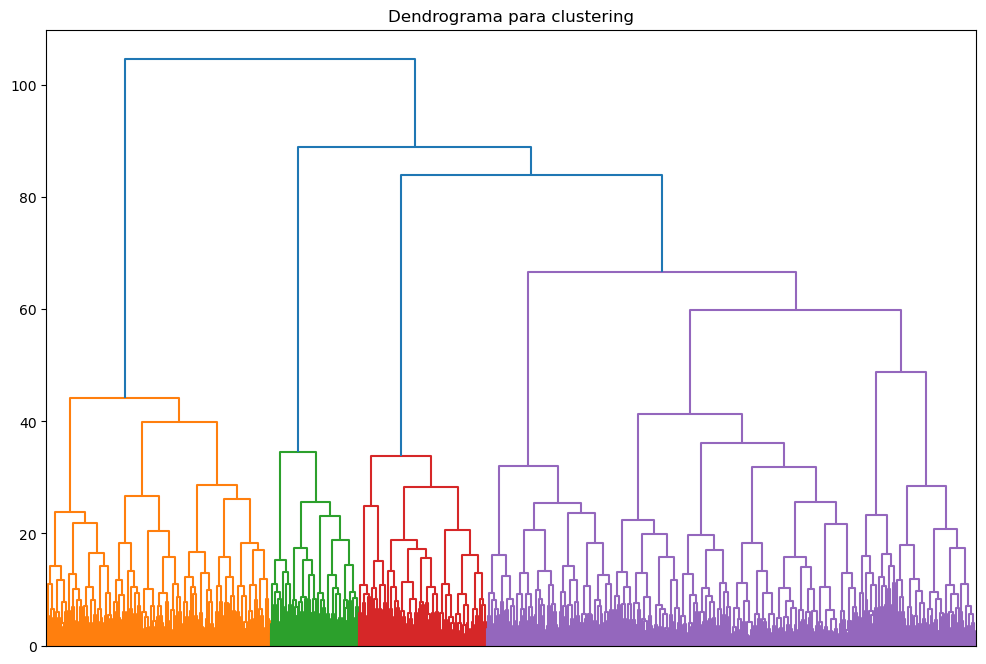

In [13]:
# Crear la matriz de distancias
linked = sch.linkage(X_scaled, method='ward')

# Trazar el dendrograma
plt.figure(figsize=(12, 8))  

# Trazar el dendrograma sin etiquetas en el eje X
dendrogram = sch.dendrogram(linked, no_labels=True)  # Opción para no mostrar etiquetas

# Desactivar las etiquetas del eje X
plt.xticks([])  # Quita todas las etiquetas del eje X

plt.title('Dendrograma para clustering')
plt.show()


**Análisis del Dendrograma y Decisión sobre el Número de Clústeres**

El dendrograma generado proporciona una representación visual jerárquica de las distancias entre los usuarios. Al observar el gráfico, se puede notar que los puntos de corte más evidentes para formar grupos están alrededor de la altura de 80, lo que sugiere la existencia de **4 clústeres principales**. Esto se deduce porque hay 4 grandes uniones al nivel de esta altura.

Sin embargo, el proyecto nos solicita usar **5 clústeres** para la fase de modelado con K-means, y esta elección tiene una justificación importante desde el punto de vista del análisis:

- **Compatibilidad con otros resultados**: Al utilizar 5 clústeres, será más fácil comparar los hallazgos con los de otros análisis realizados por colegas o estudiantes, garantizando uniformidad en los resultados.

- **Mayor granularidad**: Aunque 4 clústeres pueden ser suficientes para capturar la estructura principal, añadir un clúster adicional permite descubrir subgrupos específicos que podrían ser relevantes. Este enfoque puede revelar diferencias más sutiles en las características o comportamientos de ciertos usuarios.

- **Flexibilidad para identificar segmentos clave**: Dividir a los usuarios en 5 grupos proporciona un análisis más detallado, lo que puede ayudar a identificar segmentos específicos con distintas tasas de cancelación o patrones de comportamiento.


### Modelo de clustering con K-means

In [14]:
# Estandarización de los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(gym_churn_us)
5
# Aplicación de K-means con 5 clústeres
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
gym_churn_us['Cluster'] = kmeans.fit_predict(data_scaled)

# Obtención de estadísticas por clúster
cluster_summary = gym_churn_us.groupby('Cluster').mean()
cluster_summary

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.475694,0.825231,0.446759,0.252315,1.000000,2.643519,0.380787,30.021991,153.404553,2.461806,4.671296,1.184034,1.183023,0.001157
1,0.549645,0.842790,0.374704,0.216312,0.998818,2.750591,0.442080,29.977541,160.245842,2.528369,4.593381,2.933126,2.939963,0.007092
2,0.507447,0.760638,0.341489,0.179787,0.997872,1.567021,0.257447,26.908511,115.109065,1.513830,0.976596,1.448700,1.026250,0.997872
3,0.503619,0.938987,0.768356,0.564633,1.000000,11.168563,0.558428,29.895553,161.582993,10.218201,4.703206,2.005548,1.999999,0.015512
4,0.524804,0.866841,0.469974,0.308094,0.000000,4.806789,0.428198,29.331593,144.156967,4.493473,3.945170,1.855107,1.723740,0.263708


**1. Características generales de los clústeres:**

*Cluster 0:*
- **Mayor tasa de cancelación** (**`Churn`** = 0.450), indicando que este grupo tiene una alta probabilidad de abandonar el gimnasio.
- **Características distintivas:**
  - Pocos contratos a largo plazo (**`Contract_period`** = 2.07).
  - Baja frecuencia promedio de visitas actuales (**`Avg_class_frequency_current_month`** = 1.52).
  - Menores gastos en cargos adicionales (**`Avg_additional_charges_total`** = 132.74).

*Cluster 1:*
- **Tasa de cancelación extremadamente baja** (**`Churn`** = 0.0078), lo que representa a los clientes más leales.
- **Características distintivas:**
  - Contratos prolongados (**`Contract_period`** = 10.44).
  - Alta frecuencia de visitas actuales y totales (**`Avg_class_frequency_current_month`** = 2.78).
  - Alta proporción de participación en actividades grupales (**`Group_visits`** = 0.516).

*Cluster 2:*
- **Tasa de cancelación más alta entre los clústeres** (**`Churn`** = 0.961).
- **Características distintivas:**
  - Contratos muy cortos (**`Contract_period`** = 1.54).
  - Bajos niveles de interacción (por ejemplo, frecuencia actual de clases: **`Avg_class_frequency_current_month`** = 1.03).
  - Edad más joven promedio (**`Age`** = 26.92).

*Cluster 3:*
- **Casi nula tasa de cancelación** (**`Churn`** = 0.0033), similar al Cluster 1.
- **Características distintivas:**
  - Contratos cortos pero con alta frecuencia de clases totales y actuales.
  - Altos gastos en cargos adicionales (**`Avg_additional_charges_total`** = 157.99).

*Cluster 4:*
- **Tasa de cancelación baja** (**`Churn`** = 0.0247).
- **Características distintivas:**
  - Contratos relativamente largos (**`Contract_period`** = 8.86).
  - Alta frecuencia de visitas (**`Avg_class_frequency_total`** = 0.95).

---

**2. Correlación entre `Churn` y características clave:**

- **Duración del contrato (**`Contract_period`**):**
  - Clientes con contratos más largos (Clusters 1, 4) tienden a tener tasas de cancelación mucho más bajas.
  - En contraste, los clústeres con contratos más cortos (Clusters 0 y 2) tienen una mayor tasa de cancelación.

- **Frecuencia de clases (**`Avg_class_frequency_current_month`**):**
  - Clústeres con mayor frecuencia de visitas actuales tienen menores tasas de cancelación, como en los Clusters 1 y 3.

- **Cargos adicionales (**`Avg_additional_charges_total`**):**
  - Clientes que gastan más en cargos adicionales tienden a estar más comprometidos y presentan menores tasas de cancelación (Clusters 1, 3, y 4).

---

**3. Estrategias sugeridas:**

- **Cluster 0 y 2 (alta tasa de cancelación):**
  - Implementar campañas de fidelización, como descuentos para renovar contratos o promociones para actividades grupales.
  - Incrementar el nivel de *engagement* ofreciendo clases personalizadas o beneficios exclusivos.

- **Cluster 1 y 3 (clientes leales):**
  - Mantener estos grupos satisfechos con beneficios adicionales y promociones exclusivas para retener su lealtad.
  - Usar estos clústeres como referencia para diseñar programas dirigidos a otros clústeres.

- **Cluster 4 (moderada lealtad):**
  - Explorar oportunidades para extender los contratos, ya que tienen una mayor probabilidad de permanecer si se comprometen a largo plazo.


### Distribuciones de características para los clústeres

**Función para graficar características pareadas**

In [15]:
# Define la función para graficar características pareadas en función de los clústeres
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(data=df, x=x_name, y=y_name, hue=cluster_name, palette='Paired', s=100)
    plt.title(f'{x_name} vs {y_name} por Clústeres', fontsize=14)
    plt.xlabel(x_name, fontsize=12)
    plt.ylabel(y_name, fontsize=12)
    plt.legend(title="Clúster", fontsize=10, title_fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()

#### Relación entre la Duración del Contrato y el Tiempo Restante hasta el Final del Contrato por Clústeres

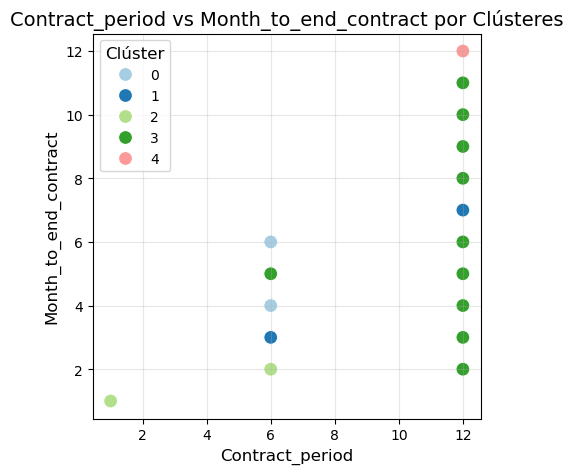

In [16]:
show_clusters_on_plot(
    df=gym_churn_us,
    x_name='Contract_period',
    y_name='Month_to_end_contract',
    cluster_name='Cluster'
)

Observaciones clave:

Duración del contrato (**`Contract_period`**):

- **Los clústeres 1 y 4 tienen los contratos más largos** (promedio superior a 8 meses), mientras que **los clústeres 2 y 3 tienen contratos significativamente más cortos** (promedio entre 1.5 y 2 meses).
- **La variabilidad es alta en todos los clústeres**, lo que sugiere que dentro de cada grupo hay tanto clientes con contratos muy cortos como clientes con contratos largos.

Tiempo restante hasta el final del contrato (**`Month_to_end_contract`**):

- **Los clústeres 2 y 3 tienen contratos que están muy cerca de su vencimiento** (promedio entre 1.5 y 1.8 meses), lo que podría indicar una **mayor probabilidad de cancelación** si no se toman medidas para retener a estos clientes.
- **Los clústeres 1 y 4 tienen más tiempo restante en sus contratos** (promedio superior a 8 meses), lo que podría indicar que estos clientes tienen más **estabilidad** y podrían ser **menos propensos a cancelar** sus contratos a corto plazo.


#### Relación entre la Duración del Contrato y la Frecuencia Total de Clases por Clústeres

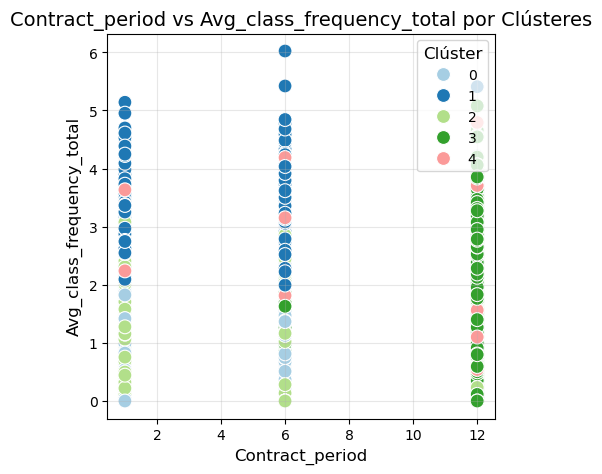

In [17]:
show_clusters_on_plot(
    df=gym_churn_us,
    x_name='Contract_period',
    y_name='Avg_class_frequency_total',
    cluster_name='Cluster'
)

Observaciones clave:

**Duración del contrato** (**`Contract_period`**):

- **Los clústeres 1 y 4 tienen los contratos más largos** (promedio superior a 8 meses), mientras que **los clústeres 0, 2 y 3 tienen contratos significativamente más cortos** (promedio entre 1.5 y 2 meses).
- **La variabilidad** es más alta en los clústeres con contratos largos (**clústeres 1 y 4**), lo que sugiere una mayor diversidad de duraciones dentro de estos grupos.

**Frecuencia total de clases** (**`Avg_class_frequency_total`**):

- **Los clústeres 1 y 3 tienen una frecuencia de clases relativamente alta** en comparación con los otros clústeres, con promedios de **2.79 y 2.20 clases por mes**, respectivamente.
- **El clúster 0 tiene una frecuencia de clases moderada** (**1.71 clases por mes**), mientras que **el clúster 4 tiene la frecuencia más baja** (**0.96 clases por mes**).
- **Los clústeres 0, 2 y 3 muestran una gran variabilidad** en la frecuencia de clases, con algunos clientes teniendo una frecuencia muy baja y otros con más clases.

**Relación entre `Contract_period` y `Avg_class_frequency_total`**:

- **Los clústeres con contratos largos** (**clústeres 1 y 4**) tienden a tener una **frecuencia de clases más baja** en promedio, especialmente en el **clúster 4**.
- **Los clústeres con contratos más cortos** (**clústeres 0, 2 y 3**) tienen una **frecuencia de clases más variada**, con algunos clientes participando más activamente que otros.

**Observación adicional**:

- Existe una **correlación entre la duración del contrato y la frecuencia de clases**: a medida que el **contrato se acorta**, la **frecuencia de clases parece aumentar** en algunos grupos, lo que podría reflejar un mayor **nivel de compromiso** por parte de los usuarios con contratos más cortos.


#### Relación entre la Frecuencia de visitas Actual y la Frecuencia Total de visitas por Clúster

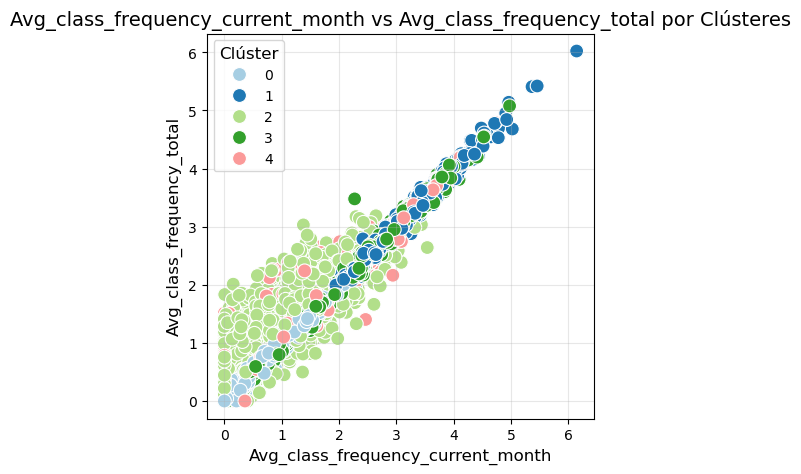

In [18]:
show_clusters_on_plot(
    df=gym_churn_us,
    x_name='Avg_class_frequency_current_month',
    y_name='Avg_class_frequency_total',
    cluster_name='Cluster'
)

Observaciones clave:

**Clústeres 1 y 3**:
- Son clientes consistentes con sus visitas, lo que facilita predecir sus hábitos de asistencia.

**Clústeres 0 y 2**:
- Tienen un comportamiento más disperso e impredecible en sus visitas.
- Algunos clientes promediaban entre una y dos visitas semanales, pero en el mes actual no han asistido ni una sola vez.

**Clúster 4**:
- Los clientes asisten con menos regularidad.
- A pesar de esto, su tasa de cancelación es moderadamente baja, lo cual es destacable.


#### Relación entre la Duración del Contrato y los Gastos Adicionales por Clúster

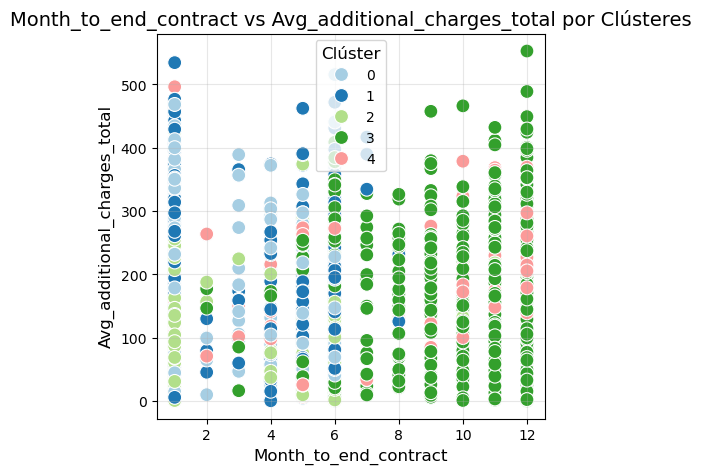

In [19]:
show_clusters_on_plot(
    df=gym_churn_us,
    x_name='Month_to_end_contract',
    y_name='Avg_additional_charges_total',
    cluster_name='Cluster'
)

**Observaciones clave:**

- **Clústeres 1 y 4**: Representan a los clientes más valiosos con contratos largos y alto gasto adicional. Son ideales para estrategias de retención a largo plazo, como recompensas y beneficios exclusivos.

- **Clústeres 0, 2 y 3**: Muestran menor compromiso con contratos cortos y menor gasto adicional en algunos casos. Estos grupos requieren incentivos, como promociones o extensiones de contrato, para aumentar su participación y fidelidad.

- **Variabilidad en los gastos adicionales**: Aunque los clústeres con contratos largos (1 y 4) tienden a gastar más, todos los grupos muestran una alta dispersión en los gastos adicionales, lo que sugiere oportunidades para personalizar las ofertas según los hábitos de consumo individuales.


#### Relación entre Tiempo de Permanencia y Meses Restantes de Contrato por Clúster

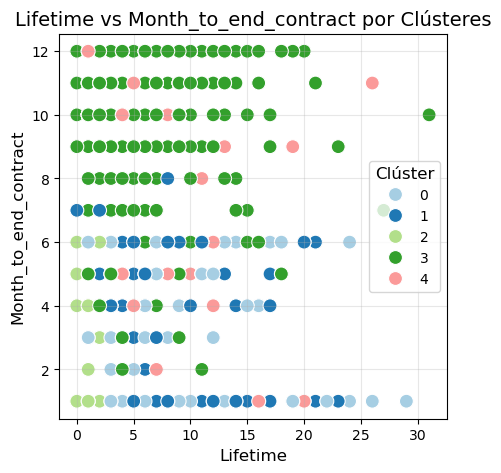

In [20]:
show_clusters_on_plot(
    df=gym_churn_us,
    x_name='Lifetime',
    y_name='Month_to_end_contract',
    cluster_name='Cluster'
)

**Observaciones clave:**

- **Clústeres 1 y 4**: Representan clientes con la posibilidad de generar contratos más largos y con el potencial de mantener una relación de consumo superior a un año, destacando su compromiso y estabilidad.

- **Clúster 2**: Este grupo se caracteriza por clientes con una duración de inscripción generalmente menor a 5 meses y contratos que no superan los 6 meses. Estos clientes tienen la tasa de cancelación más alta.

- **Clústeres 0 y 3**: Aunque tienen contratos más cortos, presentan el potencial de durar más de un año como clientes. En particular, el **clúster 3** destaca por incluir clientes que permanecen activos por más de dos años, incluso con contratos mensuales.


### Tasa de cancelación por clúster

C:\Users\Main\AppData\Local\Temp\ipykernel_5520\1928636110.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=cancelation_rate, x='Cluster', y='Churn', palette='Paired')


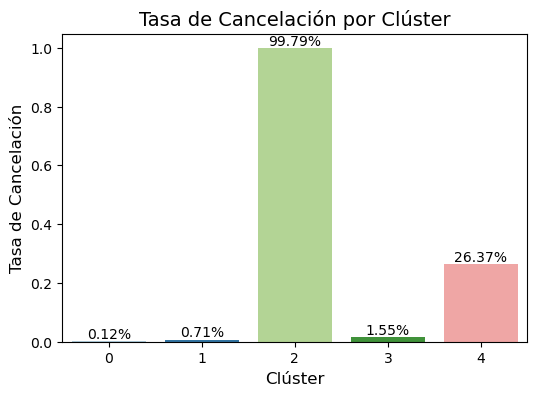

In [21]:
# Tasa de cancelación por clúster
cancelation_rate = gym_churn_us.groupby('Cluster')['Churn'].mean().reset_index()

# Crear gráfico de barras 
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=cancelation_rate, x='Cluster', y='Churn', palette='Paired')

# Título y etiquetas
plt.title('Tasa de Cancelación por Clúster', fontsize=14)
plt.xlabel('Clúster', fontsize=12)
plt.ylabel('Tasa de Cancelación', fontsize=12)

# Agregar los labels con el valor porcentual sobre cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.2f}%',  # Mostrar el valor como porcentaje
                (p.get_x() + p.get_width() / 2., height),  # Posición en el centro de la barra
                ha='center', va='center',  # Alineación del texto
                fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Mostrar gráfico
plt.show()

**Observaciones clave**:

- **Clústeres 1, 3 y 4**: Los más estables y con la menor tasa de cancelación. Serían los objetivos clave para mantener y maximizar la lealtad a largo plazo.
- **Clústeres 0 y 2**: Tienen tasas de cancelación significativamente altas. Este es un grupo que necesita atención urgente, con posibles cambios en el enfoque o incentivos para reducir la tasa de cancelación.


## Plan de Estrategia para la Interacción y Retención de Clientes
___
1. **Segmentación y Enfoque Personalizado**

    - **Clientes de clústeres 1 y 4**: Estos grupos tienen contratos largos, una baja tasa de cancelación, y están altamente comprometidos. Para mantener y aumentar su lealtad, se deben ofrecer beneficios exclusivos, como recompensas por fidelidad, programas de puntos o descuentos en servicios adicionales.  
         - **Ejemplo de implementación**: Crear un programa de membresía premium con acceso a clases especiales y promociones para estos clientes de largo plazo.

    - **Clientes de clústeres 0 y 2**: Estos grupos presentan una tasa de cancelación alta, con contratos cortos y visitas menos predecibles. Es necesario atraerlos con promociones atractivas para incentivar la renovación de contratos o ofrecer extensiones de contrato a precios especiales.  
         - **Ejemplo de implementación**: Ofrecer un descuento por renovación anticipada o una prueba gratuita de nuevos servicios para incentivar su permanencia.
___
2. **Mejorar la Experiencia de Usuario**

    - **Clientes con contratos cortos (clústeres 0, 2 y 3)**: A pesar de que algunos de estos clientes tienen una frecuencia de clases elevada, su compromiso sigue siendo incierto. Proporcionarles una experiencia de gimnasio más personalizada o asesoría personalizada puede aumentar su participación.  
         - **Ejemplo de implementación**: Asignar a los clientes de estos clústeres un entrenador personal temporal para sesiones de introducción o creación de planes de entrenamiento personalizados, fomentando la lealtad a largo plazo.

    - **Clientes con baja frecuencia de clases (clúster 4)**: A pesar de su baja frecuencia de asistencia, estos clientes muestran un bajo nivel de cancelación. Fomentar su participación con clases grupales exclusivas o eventos especiales puede aumentar su compromiso.  
         - **Ejemplo de implementación**: Organizar eventos especiales de fitness para los clientes del clúster 4, creando una comunidad activa y motivada.
___
3. **Incentivar el Gasto Adicional y la Diversificación de Servicios**

    - **Clientes con altos gastos adicionales (clústeres 1 y 4)**: Aprovechar su disposición a gastar en servicios adicionales como clases extra o productos de bienestar para maximizar los ingresos.  
         - **Ejemplo de implementación**: Ofrecer un paquete premium que incluya clases personalizadas, productos exclusivos de bienestar o acceso prioritario a eventos especiales.

    - **Clientes con menor gasto (clúster 0 y 3)**: Incentivar el aumento del gasto adicional mediante paquetes promocionales o descuentos en servicios complementarios.  
         - **Ejemplo de implementación**: Ofrecer un paquete de inicio gratuito que incluya un servicio adicional de nutrición o una clase de prueba para incentivar a los clientes a gastar más en su experiencia.
___
4. **Fortalecer la Retención a Largo Plazo**

    - **Clientes de clústeres 1, 3 y 4**: Con la menor tasa de cancelación, son los más estables y se pueden retener mediante estrategias de fidelización a largo plazo. Estos clústeres son ideales para estrategias de recompensas por lealtad.  
         - **Ejemplo de implementación**: Implementar un sistema de puntos que recompense cada clase o interacción con el gimnasio, permitiendo que los clientes canjeen puntos por servicios adicionales o descuentos en futuras renovaciones de contrato.

    - **Clientes de clústeres 0 y 2**: Necesitan atención urgente. Ofrecer incentivos como descuentos exclusivos para su renovación de contrato o un seguimiento personalizado puede reducir significativamente su tasa de cancelación.  
         - **Ejemplo de implementación**: Crear un paquete de renovación con descuento y una campaña de comunicación personalizada que los incentive a renovar y comprometerse a largo plazo.

